In [78]:
def divisive(X,clus):
  def get_diameter(X, i):
      """Returns the diameter of the ith cluster in X"""
      A=X[i]
      dist_mat=np.zeros((len(A),len(A)))
      for i in range(len(A)):
        for j in range(len(A)):
          dist_mat[i,j]=round(np.linalg.norm(A[i]-A[j]),2)
      diameter = np.max(dist_mat,axis=None)
      return diameter

  def get_biggest_cluster(X):
      """ Returns the cluster index having largest diameter"""
      # index having max diameter
      diameters=[]
      for i in range(len(X)):
        diameters.append(get_diameter(X,i))
      max_cluster_ind=diameters.index(max(diameters))
      return max_cluster_ind

  def avg_spl_dists(cluster, splinter):
      """ Return the average of distances of each point belonging to cl wrt splinter"""
      avg_dists=np.sum(np.linalg.norm(cluster-splinter,axis=1))/(cluster.shape[0]-1)
      return avg_dists
  def avg_spl_dists2(cluster, splinter):
      """ Return the average of distances of each point belonging to cl wrt splinter"""
      avg_dists=np.sum(np.linalg.norm(cluster-splinter,axis=1))/(cluster.shape[0])
      return avg_dists
  def nearest_point(new,cluster):
      arr=[]
      for a in cluster:
        a=np.reshape(a,(1,cluster.shape[1]))
        arr.append(avg_spl_dists2(new, a))
      return arr.index(min(arr))
  def plot(A):
    fig = plt.figure()
    for i in range(len(A)):
      plt.scatter(A[i][:,0],A[i][:,1])
    plt.show()
  A=[X]
  plot(A)
  while len(A)<len(X) and len(A)<clus:
    k=get_biggest_cluster(A)
    cluster=A[k]
    # print("biggest cluster")
    # print(cluster)
    avg_dist=[]
    for a in cluster:
      a=np.reshape(a,(1,cluster.shape[1]))
      avg_dist.append(avg_spl_dists(cluster, a))
    j=avg_dist.index(max(avg_dist))
    new=np.reshape(cluster[j],(1,cluster.shape[1]))
    cluster=np.delete(cluster,j,0)
    i=nearest_point(new,cluster)
    a=np.reshape(cluster[i],(1,cluster.shape[1]))
    while avg_spl_dists2(new, a)<avg_spl_dists(cluster, a):
      new=np.concatenate((new,a),axis=0)
      cluster=np.delete(cluster,i,0)
      i=nearest_point(new,cluster)
      a=np.reshape(cluster[i],(1,cluster.shape[1]))
    A[k]=cluster
    A.append(new)
    plot(A)
  return A

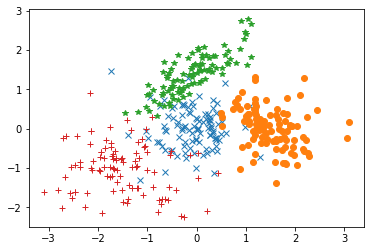

In [79]:
import numpy as np
import matplotlib.pyplot as plt

## Data generation
# write your code here
mean=np.array([0,0])
cov=0.3*np.array([[1,0],[0,1]])
x4=np.random.multivariate_normal(mean, cov, 100)
plt.plot(x4[:,0],x4[:,1],"x")

mean=np.array([1.5,0])
cov=0.3*np.array([[1,0],[0,1]])
x2=np.random.multivariate_normal(mean, cov, 100)
plt.plot(x2[:,0],x2[:,1],"o")

mean=np.array([0,1.5])
cov=np.array([[0.3,0.25],[0.25,0.3]])
x3=np.random.multivariate_normal(mean, cov, 100)
plt.plot(x3[:,0],x3[:,1],"*")

mean=np.array([-1.5,-1])
cov=0.4*np.array([[1,0],[0,1]])
x1=np.random.multivariate_normal(mean, cov, 100)
plt.plot(x1[:,0],x1[:,1],"+")

plt.show()

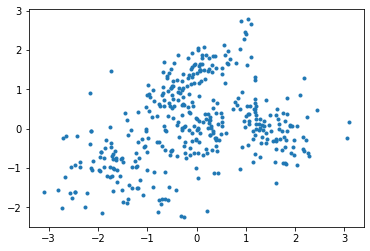

In [80]:
x=np.concatenate((x1,x2,x3,x4), axis=0)
plt.plot(x[:,0],x[:,1],".")

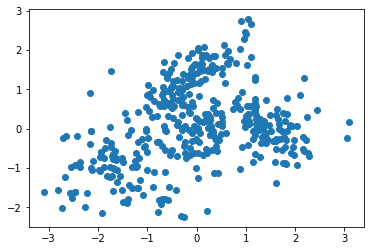

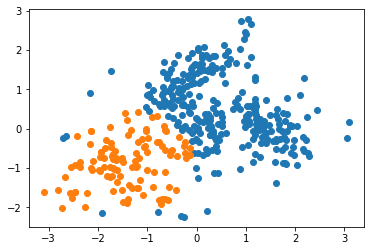

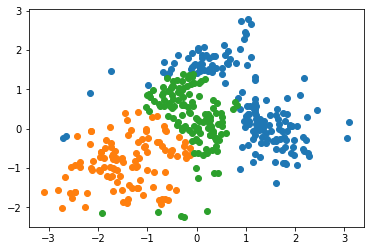

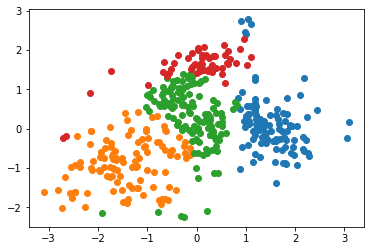

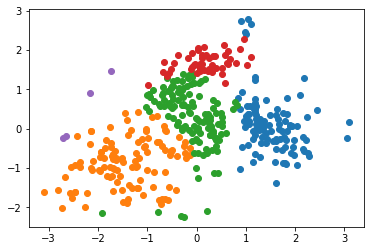

In [81]:
A=divisive(x,5)